In [1]:
import theano
from theano import tensor as T
import numpy as np

In [2]:
# prepare
trX = np.linspace(-1, 1, 101) # [-1, 1]の101等分のデータ点
trY = 2 * trX + np.random.randn(*trX.shape)*0.33 # trXと同じ数のランダム値な正解データ点

In [3]:
# X, Y シンボル
X = T.scalar()
Y = T.scalar()

In [4]:
# シンボルXと共有変数wの乗算
def model(X, w):
    return X * w

In [5]:
# パラメータとy
w = theano.shared(np.asarray(0., dtype=theano.config.floatX)) # パラメータwの共有変数
y = model(X, w) # y = X * w

In [6]:
# calc
# コスト関数
cost = T.mean(T.sqr(y-Y)) # y(予測値)とY(正解データ値)の二乗平均誤差

gradient = T.grad(cost=cost, wrt=w) # コスト関数のwによる微分勾配
updates = [[w, w - 0.01*gradient]] # wの更新式

In [7]:
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

# updatesはoutputsのあとに処理される

In [8]:
costs = []

In [9]:
for i in range(100):
    for x, y in zip(trX, trY):
        costs.append(train(x, y))
    if i%10==0:
        print i, w.get_value()

0 1.00315701962
10 2.00954270363
20 2.01054620743
30 2.01054763794
40 2.01054763794
50 2.01054763794
60 2.01054763794
70 2.01054763794
80 2.01054763794
90 2.01054763794


In [10]:
y_ = trX * w.get_value()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

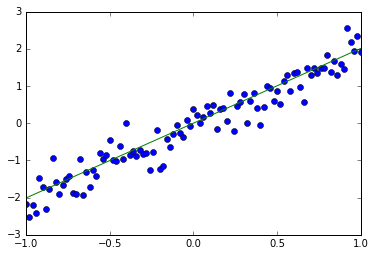

In [12]:
plt.plot(trX, trY, "o")
plt.plot(trX, y_)

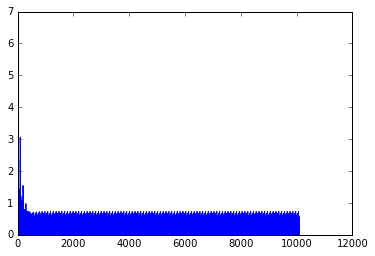

In [28]:
plt.plot(range(len(costs)), costs)

In [25]:
costs[1010]

array(0.026916973292827606, dtype=float32)